In [28]:
import numpy as np
import matplotlib.pyplot as plt

Challenge 1: The following cell contains the outline of the n-armed bandit testbed described in chapter 2. Complete the code so as to produce the plots in the book.

In [38]:
def n_armed_bandit(k,eps):
  # K number of arms
  # eps epsilon value it is the e, percent of times to choose the random action

    # Matrix storing rewards
    rewards_received=np.zeros((1000, 2000))

    for run in range(0,2000):
        # We generate the slot machine probabilities
        R_means=np.random.normal(0,1,k)
        # We have 10 possible action
        # Q estimate value = k values of Q here
        Q = [0.0] * k
        # N many times
        N = [0.1] * k
        for i in range(1,1000):
          R_means = R_means +np.random.normal(0,0.1)
          # Basically generate a random number and if its less than epsilon, then
          if np.random.rand() < eps:
            A = np.random.randint(0,k)
          else:
            A = Q.index(max(Q))

          # A = argmax(Q)
          R=np.random.normal(R_means[A],1)

          # updating value estimate based on current reward
          # This is
          # Updating by how much above and beyond reward compared to the estimate value
          N[A] += 1

          Q[A] = Q[A] + (1.0 / N[A]) * (R - Q[A])

          rewards_received[i,run] = R

    return([np.mean(vec) for vec in rewards_received])


# import numpy as np

# def n_armed_bandit(k, eps):
#     """
#     k   : number of arms
#     eps : epsilon for epsilon-greedy exploration
#     Returns: average reward at each step across runs (length = 1000)
#     """
#     steps = 1000
#     runs = 2000

#     # Matrix storing rewards: rows = time steps, cols = runs
#     rewards_received = np.zeros((steps, runs))

#     for run in range(runs):
#         # True action values (stationary Gaussian bandit)
#         R_means = np.random.normal(0, 1, k)

#         # Estimates and counts
#         Q = np.zeros(k, dtype=float)
#         N = np.zeros(k, dtype=float)

#         for t in range(steps):
#             # --- epsilon-greedy action selection ---
#             if np.random.rand() < eps:
#                 A = np.random.randint(0, k)                  # explore
#             else:
#                 # break ties randomly to avoid sticking to the first max
#                 max_val = np.max(Q)
#                 cand = np.flatnonzero(Q == max_val)
#                 A = np.random.choice(cand)                    # exploit

#             # --- sample reward from the chosen arm ---
#             R = np.random.normal(R_means[A], 1)

#             # --- incremental sample-average update (order matters!) ---
#             N[A] += 1
#             Q[A] = Q[A] + (1.0 / N[A]) * (R - Q[A])

#             # log reward for this step/run
#             rewards_received[t, run] = R

#     # average reward per step across runs
#     return np.mean(rewards_received, axis=1).tolist()


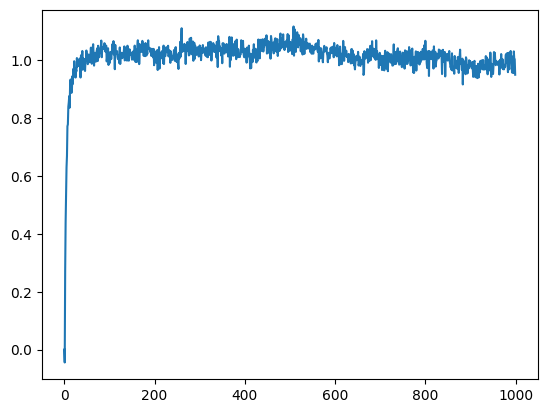

In [39]:
out = n_armed_bandit(10,0)
plt.plot(out)

In [12]:
q = [0.0]* 10
q

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [10]:
k = 10
pr= np.random.normal(0,1,k)
print(pr)
A=1
# Testing the reward
R=float(pr[A])
R

[ 1.99952678 -1.1348124   1.10005933 -0.75932578  0.45906127 -1.97106633
  0.27942116 -0.39288487 -1.38070531 -1.52864421]


-1.1348124006814262

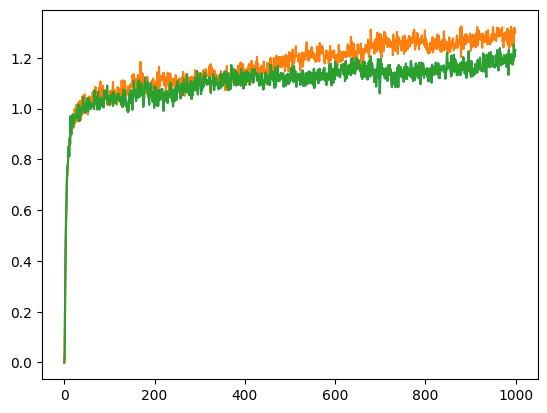

In [40]:
no_exploration=n_armed_bandit(10,0)
plt.plot(no_exploration)
small_exploration=n_armed_bandit(10,0.01)
plt.plot(small_exploration)
medium_exploration=n_armed_bandit(10,0.1)
plt.plot(medium_exploration)